Resourcess consulted:
    
    
    1. Udacity knowledge
    2. Stack Overflow
    3. Mastering social media mining by Maco Bonzanini
    4. Iternet
    
    

In [1]:
#importing the necessary modules used in the wrangling act
import requests
import os
from bs4 import BeautifulSoup
import pandas as pd
import key
import tweepy
import json
import time
import numpy as np
import zipfile
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import string
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import nltk 
from datetime import datetime
import matplotlib.dates as mdates
import pickle

In [2]:
# auhenticating with Twitter
auth = tweepy.OAuthHandler(key.consumer_key, key.consumer_secret)
auth.set_access_token(key.access_token, key.access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [3]:
#unziping 
with zipfile.ZipFile('twitter-2020-06-16-8dc14822316dcb170db887fbf21023d21835790ba0dfb5ee0d4667fddcd4c30d.zip', 'r') as myzip:
    myzip.extractall()

In [2]:
#reading in twitter-archive-enhanced.csv into a pandas dataframe
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#taking a glance at the first few lines of the dataset
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# a look at the concise summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
#a look at the tail of the document
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
#creating the folder tweet_ids just incase it does not alread exist
folder = 'tweet_ids'
if not os.path.exists(folder):
    os.makedirs(folder) 

In [9]:
#programmaicall downloading the contnt of the given url
URL ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)
response

<Response [200]>

In [10]:
# a look at the content of the download
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [11]:
# fething the last item of url download into the folder and parsing the item with beautiful soup
with open(os.path.join(folder, URL.split('/')[-1]))as file:
    soup = BeautifulSoup(file, 'lxml')
soup 

<html><body><p>tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog
666020888022790149	https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg	1	Welsh_springer_spaniel	0.465074	True	collie	0.156665	True	Shetland_sheepdog	0.0614285	True
666029285002620928	https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg	1	redbone	0.506826	True	miniature_pinscher	0.07419169999999999	True	Rhodesian_ridgeback	0.07201	True
666033412701032449	https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg	1	German_shepherd	0.596461	True	malinois	0.13858399999999998	True	bloodhound	0.11619700000000001	True
666044226329800704	https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg	1	Rhodesian_ridgeback	0.408143	True	redbone	0.360687	True	miniature_pinscher	0.222752	True
666049248165822465	https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg	1	miniature_pinscher	0.560311	True	Rottweiler	0.243682	True	Doberman	0.154629	True
666050758794694657	https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg	1	Bernese_mountain_dog	0.651137	Tr

In [12]:
# writing the content of the folder into a file handle
with open('tweet_ids/image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
#reading the content of the folder into a pandas dataframe
image_predictions  = pd.read_csv('tweet_ids/image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#getting the values of the tweet_id column of the df dataframe
tweet_id =df.tweet_id.values
tweet_id

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [17]:
#fetching Twitter data via tweepy
count =0
fails_dict ={}
print('start time')
start_time = time.time()
print(start_time)
#save each tweet's returned Json as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    #This loop will likely take 20 -30 minutes to run because of Twitter's rate limit
    for id_str in tweet_id:
        count+=1
        print(str(count) + ": " + str(id_str))
        try:
            status = api.get_status(id_str, tweet_mode='extended')._json
            print('success')
            json.dump(status, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print('fail')
            fails_dict[id_str] =e
            pass
end_time = time.time()
print(end_time - start_time)
print(fails_dict)

start time
1596115315.5093882
1: 892420643555336193
success
2: 892177421306343426
success
3: 891815181378084864
success
4: 891689557279858688
success
5: 891327558926688256
success
6: 891087950875897856
success
7: 890971913173991426
success
8: 890729181411237888
success
9: 890609185150312448
success
10: 890240255349198849
success
11: 890006608113172480
success
12: 889880896479866881
success
13: 889665388333682689
success
14: 889638837579907072
success
15: 889531135344209921
success
16: 889278841981685760
success
17: 888917238123831296
success
18: 888804989199671297
success
19: 888554962724278272
success
20: 888202515573088257
fail
21: 888078434458587136
success
22: 887705289381826560
success
23: 887517139158093824
success
24: 887473957103951883
success
25: 887343217045368832
success
26: 887101392804085760
success
27: 886983233522544640
success
28: 886736880519319552
success
29: 886680336477933568
success
30: 886366144734445568
success
31: 886267009285017600
success
32: 88625838415188787

In [18]:
#re-running the exceptions from twitter
exception2 ={}
count_2 =0
print('start time')
start_time = time.time()
print(start_time)
#save each tweet's returned Json as a new line in a .txt file
with open('exceptions_json.txt', 'w') as file:
    for e in fails_dict:
        count_2+=1
        print(str(count_2) + ": " + str(e))
    try:
        tweet = api.get_status(e, tweet_mode='extended')._json
        print('success')
        json.dump(tweet, file)
        file.write('\n')
    except tweepy.TweepError as p:
        print('fail')
        exception2[e] =p
        pass
end_time = time.time()
print(end_time - start_time)
print(exception2)

start time
1596118856.5204055
1: 888202515573088257
2: 873697596434513921
3: 872668790621863937
4: 872261713294495745
5: 869988702071779329
6: 866816280283807744
7: 861769973181624320
8: 856602993587888130
9: 851953902622658560
10: 845459076796616705
11: 844704788403113984
12: 842892208864923648
13: 837366284874571778
14: 837012587749474308
15: 829374341691346946
16: 827228250799742977
17: 812747805718642688
18: 802247111496568832
19: 779123168116150273
20: 775096608509886464
21: 771004394259247104
22: 770743923962707968
23: 759566828574212096
24: 754011816964026368
25: 680055455951884288
fail
2.059203624725342
{680055455951884288: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}


In [9]:
#creating a pandas dataframe with column headers for tweet_json
tweet_json = pd.DataFrame(columns=['id_','tweet_id', 'retweet_count', 'favorite_count'])

In [10]:
#reading in the content of twitter download into a pandas dataframe
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        id_ =status['id']
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_json = tweet_json.append(pd.DataFrame([[id_, tweet_id, retweet_count, favorite_count]],columns=['id_','tweet_id', 'retweet_count', 'favorite_count']))
tweet_json = tweet_json.reset_index(drop=True)

In [11]:
#a look at the tweet_json file from twitter  
tweet_json  

,id_,tweet_id,retweet_count,favorite_count
0,892420643555336193,892420643555336193,7608,35887
1,892177421306343426,892177421306343426,5632,30952
2,891815181378084864,891815181378084864,3728,23296
3,891689557279858688,891689557279858688,7782,39151
4,891327558926688256,891327558926688256,8380,37413
...,...,...,...,...
2326,666049248165822465,666049248165822465,40,96
2327,666044226329800704,666044226329800704,130,269
2328,666033412701032449,666033412701032449,41,111
2329,666029285002620928,666029285002620928,42,120


In [12]:
#a consice summary of the tweet_json file 
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_             2331 non-null   object
 1   tweet_id        2331 non-null   object
 2   retweet_count   2331 non-null   object
 3   favorite_count  2331 non-null   object
dtypes: object(4)
memory usage: 73.0+ KB


In [13]:
# glancing at value_counts of the retweet_count column of the tweet_json file
tweet_json.retweet_count.value_counts()

451      7
210      5
222      5
958      5
552      4
        ..
1804     1
9997     1
1808     1
10005    1
1        1
Name: retweet_count, Length: 1684, dtype: int64

In [14]:
#checking to see if there null values for the id column of the tweet_json file
tweet_json[tweet_json.id_.isnull()]

,id_,tweet_id,retweet_count,favorite_count


twitter-archive-enhanced.csv Table


Quality issues on visual assessment

    1. Null values for the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,
        retweeted_status_user_id, retweeted_status_timestamp.
    2. timestamp column contains +0000 which looks redundant
    3. Incorrect represntation for name in the name column such as a, an, None etc.
    
    

twitter-archive-enhanced.csv Table

Programmatic assessment





In [15]:
# a look at the value_counts of the source column of the df file
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
line_1 =list(df.text)
line_1

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps:

In [17]:
#displaying the value_counts for the text column 
df.text.value_counts()

RT @dog_rates: This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https:…    1
This is Gòrdón. He enjoys his razberrita by pool. Not a care in the world. 12/10 this dog has a better life than me https://t.co/zpdBQCcYgW     1
This pupper likes tape. 12/10 https://t.co/cSp6w5GWgm                                                                                           1
RT @dog_rates: This is Scout. He really wants to kiss himself. H*ckin inappropriate. 11/10 narcissistic af https://t.co/x0gV2Ck3AD              1
This is Ron. Ron's currently experiencing a brain freeze. Damn it Ron. 8/10 https://t.co/4ilfcR5SlK                                             1
                                                                                                                                               ..
"You got any games on your phone" 7/10 for invasive brown Dalmatian pupper https://t.co/yzGR9xjE9Q                          

In [18]:
# a look at the value_counts of the name column of the df file
df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Shikha       1
Zeus         1
Tonks        1
Randall      1
Boots        1
Name: name, Length: 957, dtype: int64

In [19]:
#checking for duplicatas in the name column of the df file 
df[df.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [20]:
#checking for the value_counts of the rating_denominator of the df file
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# a look at the dataframe with values of rating_numerator less than 10 
df[df['rating_numerator']<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [22]:
#checking for the value_counts of the rating_numerator of the df file
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [27]:
#investigating to see dogs with multiple stages 
df.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


twitter-archive-enhanced.csv Table


Quality issues on Programmatic assessment


4. timestamp  is in object instead of datatime
5. Rating denominator has values less than and greater than 10
6. Rating numarator has values less han 10
7. the tweet contents of the text column include emoticons, hashtags, user mentions, URLs, and is quite different from standard English
8. the text column contains stop-word
9. different terms in the same unit within the text column are not normalized
10. the source column contains four different url links per row 
11. missing records for the name column
12. The given Datasets are in different formarts


Tidyness issues on Programmatic assessment


1. There are 'None' entries instead of NaN in the dog stages
2. Dog stage is consistng of four columns instead of one
3. Some dogs have multiple stages   


tweet_json.txt Table: Quality issues on Programmatic assessment
13. retweet_count is of type string
14. favorite_count is of type string



Clean quality issues


In [28]:
#making a copy of the original file so as to keep the original intact 
df_clean = df.copy()
tweet_json_clean = tweet_json.copy()
image_predictions_clean = image_predictions.copy()

Define

1. Filter null entries for the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. After filtering, drop those columns as they are of no use in our analysis

code

In [29]:
#filltering null values
df_clean =df_clean[df_clean.in_reply_to_status_id.isnull()]

In [30]:
#filltering null values
df_clean = df_clean[df_clean.in_reply_to_user_id.isnull()]

In [31]:
#filltering null values
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

In [32]:
#filltering null values
df_clean = df_clean[df_clean.retweeted_status_user_id.isnull()]

In [33]:
#filltering null values
df_clean = df_clean[df_clean.retweeted_status_timestamp.isnull()]

In [34]:
#dropping the fillered columns
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

Test

In [35]:
# checking to confirm the fillering was successful 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


Define

2. Use pyton str function to slice off the reduntant values off the timestamp column


In [36]:
df_clean['timestamp'] = df_clean['timestamp'].str[:-5]

Test

In [37]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Define

3. Incorrect represntation for name in the name column such as a, an, None etc.
Idealy the names of the dogs could have been extracted from the text column using regular expressions but it is obvious with respect to my qeury on 21st July 2020, and the reply below by Kartik G, a Mentor, we can't do much with respect to cleaning the name column:
    
    Hi Maxwell,

Since dog names can be difficult to mine from the text as there might be no particular pattern by which it can be extracted(even with regex), I suggest you to use this variable as such. However, since this variable contains nominal values I suggest you not to utilise it for analysis (trends) but you can surely use it to find metrics like the highest rated dog or lowest rated dog name etc

Define


4. Change timestamp column from string into datetime object using pandas_to_dateime function

In [ ]:
code

In [38]:
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])

Test

In [39]:
type(df_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

Define

5. Use regular expressions to extract for Rating denominators with only the value of 10 then use Python str.replace function to replace the forward slash with an empty space 

Code

In [40]:
df_clean['rating_denominator']= df_clean.text.str.extract(r'(\b[/][1][0]\b)')
df_clean['rating_denominator'] = df_clean['rating_denominator'].str.replace('/', ' ')
df_clean['rating_denominator'] = df_clean['rating_denominator'].fillna(0)
df_clean.rating_denominator =df_clean.rating_denominator.astype(int)

In [41]:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int32         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 284.8+ KB


Test



In [42]:

df_clean.rating_denominator


0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2097, dtype: int32

In [43]:
type(df_clean['rating_denominator'][0])

numpy.int32

Define


6. Use regular expressions to extract for Rating numarator with only the value of 10 and above then use Python str function to slice off the last value being a forward slash and fill NaN with zeros thereafter convert back to integers

Code

In [44]:
df_clean['rating_numerator'] = df_clean.text.str.extract(r'(\d{2,}[/]\b)', expand=True)
df_clean['rating_numerator'] = df_clean['rating_numerator'].str[:-1]
df_clean['rating_numerator'] = df_clean['rating_numerator'].fillna(0)
df_clean.rating_numerator =df_clean.rating_numerator.astype(int)

Test

In [45]:

df_clean.rating_numerator

0       13
1       13
2       12
3       13
4       12
        ..
2351     0
2352     0
2353     0
2354     0
2355     0
Name: rating_numerator, Length: 2097, dtype: int32

In [46]:
type(df_clean['rating_numerator'][0])

numpy.int32

Define

for quality issues number 7, 8 and 9 
use a function that takes a string as input and returns a list of strings as output. All the preprocessing steps for quality issues number 7, 8 and 9, smentioned earlier, namely:

a. case normalization

b. tokenization

c. stop words removal

are implemented here in a few lines a code.
The function also takes two more optional arguments: a tokenizer, that is, an object that implements a tokenize() method and a list of stop words, so the stop word-removal process can be customized. When applying stop word removal, the function also removes numerical tokens (for example, '5' or '42') using the isdigit() function over a string.

code:


In [47]:
def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    """Process the text of a tweet:
    - Lowercase
    - Tokenize
    - Stopword removal
    - Digits removal

    Return: list of strings
    """
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]
def normalize_contractions(tokens):
    """Example of normalization for English contractions.

    Return: generator
    """
    token_map = {
        "i'm": "i am",
        "you're": "you are",
        "it's": "it is",
        "we're": "we are",
        "we'll": "we will",
    }
    for tok in tokens:
        if tok in token_map.keys():
            for item in token_map[tok].split():
                yield item
        else:
            yield tok
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt', 'via']   
column = df_clean.text.values
tf = Counter()
for line in column:
    tokens = process(text=line,tokenizer=tweet_tokenizer,stopwords=stopword_list)
    tf.update(tokens)
    print(tokens)

['phineas', "he's", 'mystical', 'boy', 'ever', 'appears', 'hole', 'donut', '13/10', 'https://t.co/mguwq76dju']
['tilly', 'checking', 'pup', 'hopes', 'ok', 'available', 'pats', 'snugs', 'boops', 'whole', 'bit', '13/10', 'https://t.co/0xxu71qeiv']
['archie', 'rare', 'norwegian', 'pouncing', 'corgo', 'lives', 'tall', 'grass', 'never', 'know', 'one', 'may', 'strike', '12/10', 'https://t.co/wunznhtvjb']
['darla', 'commenced', 'snooze', 'mid', 'meal', '13/10', 'happens', 'best', 'us', 'https://t.co/td36da7qlq']
['franklin', 'would', 'like', 'stop', 'calling', 'cute', 'fierce', 'shark', 'respected', '12/10', '#barkweek', 'https://t.co/atuzn91f7f']
['majestic', 'great', 'white', 'breaching', 'south', "africa's", 'coast', 'absolutely', 'h', 'ckin', 'breathtaking', '13/10', 'ig', 'tucker_marlo', '#barkweek', 'https://t.co/kq04fddrmh']
['meet', 'jax', 'enjoys', 'ice', 'cream', 'much', 'gets', 'nervous', 'around', '13/10', 'help', 'jax', 'enjoy', 'things', 'clicking', 'https://t.co/zr4hwfas1h', 'h

Define

13. convert retweet_count from type string to type integer using Python astype function

Code:

In [48]:
tweet_json_clean.retweet_count = tweet_json_clean.retweet_count.astype(int)


Test



In [49]:
type(tweet_json_clean['retweet_count'][0])

numpy.int32

Define
14. convert favorite_count from type string to type integer using Python astype function

Code:

In [50]:
tweet_json_clean.favorite_count = tweet_json_clean.favorite_count.astype(int)

Test



In [51]:
type(tweet_json_clean['favorite_count'][0])

numpy.int32

Clean Tidyness issues



Define

1. Use Python replace function to replace the None entries in the following columns with empty string: doggo, floofer,pupper and puppo
Code:

In [52]:
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

Test



In [53]:
df_clean.doggo.value_counts()
df_clean.floofer.value_counts()
df_clean.pupper.value_counts()
df_clean.puppo.value_counts()

         2073
puppo      24
Name: puppo, dtype: int64

Define

2. Combine the four Dog stage columns into one and use pandas .loc function to create a comma separated stages and to convert the empty strings to NaN. Then drop the original four dog stages 
Code:

In [54]:
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [55]:
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [56]:
df_clean.loc[df_clean.dog_stage == '', 'dog_stage'] = np.nan

In [57]:
df_clean.drop(['doggo', 'floofer','pupper','puppo'], axis=1, inplace=True)

Tests



In [58]:
df_clean.dog_stage.value_counts()

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [59]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int32         
 6   rating_denominator  2097 non-null   int32         
 7   name                2097 non-null   object        
 8   dog_stage           336 non-null    object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(5)
memory usage: 227.4+ KB


In [61]:
#storing our various files as csv files
df_clean.to_csv('twitter-archive-enhanced-master.csv', index=False)
image_predictions.to_csv('image_predictions_master.tsv', index=False)
tweet_json.to_csv('tweet_json_master.txt', index=False)

In [62]:
#merging df_clean with image_predictions
twitter_archive_master=pd.merge(df_clean, image_predictions,
                            on=['tweet_id'], how='inner')

Test



In [63]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,0,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1967,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,0,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1968,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,0,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1969,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,0,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


Tidiness issue



Define


merging twitter_archive_master with tweet_json file

In [64]:
twitter_archive_master = pd.merge(left=twitter_archive_master, right = tweet_json,
                    left_on ='tweet_id',  right_on = 'id_', how ='inner')

Test



In [65]:
twitter_archive_master

,tweet_id_x,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id_,tweet_id_y,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,bagel,0.085851,False,banana,0.076110,False,892420643555336193,892420643555336193,7608,35887
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,892177421306343426,5632,30952
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,891815181378084864,3728,23296
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,891689557279858688,7782,39151
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,891327558926688256,8380,37413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,0,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,Rottweiler,0.243682,True,Doberman,0.154629,True,666049248165822465,666049248165822465,40,96
1960,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,0,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,666044226329800704,666044226329800704,130,269
1961,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,0,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,malinois,0.138584,True,bloodhound,0.116197,True,666033412701032449,666033412701032449,41,111
1962,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,0,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,666029285002620928,666029285002620928,42,120


Define

drop the id_ and tweet_id_y columns and rename the tweet_id_x column to tweet_id


In [66]:
twitter_archive_master.drop(['id_', 'tweet_id_y'], axis=1, inplace=True)
twitter_archive_master=twitter_archive_master.rename(columns = {'tweet_id_x':'tweet_id'})

Test




In [67]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7608,35887
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5632,30952
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3728,23296
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7782,39151
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8380,37413


Define 

store twitter_archive_master as a csv file.
code:

In [68]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

Test



In [69]:
#reading our cleaned twittr_archive_master into a pandas dataframe 
twitter_archive_master=pd.read_csv('twitter_archive_master.csv', dtype={'retweet_count':int, 'favorite_count':int},parse_dates=['timestamp'],infer_datetime_format=True)
twitter_archive_master.head()    

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7608,35887
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5632,30952
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3728,23296
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7782,39151
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8380,37413


In [70]:
# a concise info on our cleaned twitter_archive_master
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   expanded_urls       1964 non-null   object        
 5   rating_numerator    1964 non-null   int64         
 6   rating_denominator  1964 non-null   int64         
 7   name                1964 non-null   object        
 8   dog_stage           302 non-null    object        
 9   jpg_url             1964 non-null   object        
 10  img_num             1964 non-null   int64         
 11  p1                  1964 non-null   object        
 12  p1_conf             1964 non-null   float64       
 13  p1_dog              1964 non-null   bool        

In [72]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.964000e+03,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03,1964.000000,1964.000000
mean,7.358154e+17,10.744399,9.847251,1.202138,0.593928,1.346393e-01,6.028936e-02,2443.133401,8251.035132
std,6.744191e+16,41.978002,1.226755,0.559615,0.272134,1.009430e-01,5.096697e-02,4364.307389,12128.442152
min,6.660209e+17,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,70.000000
25%,6.758399e+17,10.000000,10.000000,1.000000,0.362775,5.352722e-02,1.619708e-02,543.000000,1771.500000
50%,7.087246e+17,11.000000,10.000000,1.000000,0.587357,1.173995e-01,4.947920e-02,1182.500000,3733.000000
75%,7.877408e+17,12.000000,10.000000,1.000000,0.847062,1.955617e-01,9.162278e-02,2791.250000,10301.250000
max,8.924206e+17,1776.000000,10.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,76816.000000,154645.000000


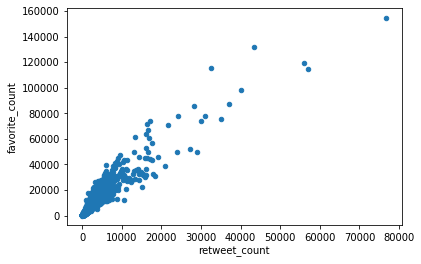

In [73]:
twitter_archive_master.plot(x='retweet_count', y= 'favorite_count', kind =('scatter'));



This analysis focuses on unstructured data, that is, the raw text of the tweet



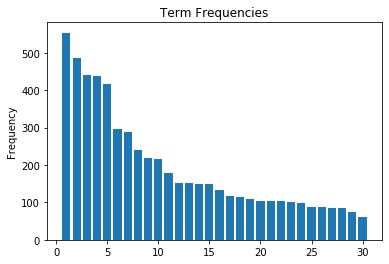

In [71]:
y = [count for tag, count in tf.most_common(30)]
x = range(1, len(y)+1)
plt.bar(x, y)
plt.title("Term Frequencies")
plt.ylabel("Frequency")
plt.savefig('term_distribution.png')

In [74]:
cols_plot = ['timestamp','rating_numerator', 'name']
df_group1 = twitter_archive_master[cols_plot].dropna()
df_group1

,timestamp,rating_numerator,name
0,2017-08-01 16:23:56,13,Phineas
1,2017-08-01 00:17:27,13,Tilly
2,2017-07-31 00:18:03,12,Archie
3,2017-07-30 15:58:51,13,Darla
4,2017-07-29 16:00:24,12,Franklin
...,...,...,...
1959,2015-11-16 00:24:50,0,None
1960,2015-11-16 00:04:52,0,a
1961,2015-11-15 23:21:54,0,a
1962,2015-11-15 23:05:30,0,a


Text(0, 0.5, 'ratings_year_after_year')

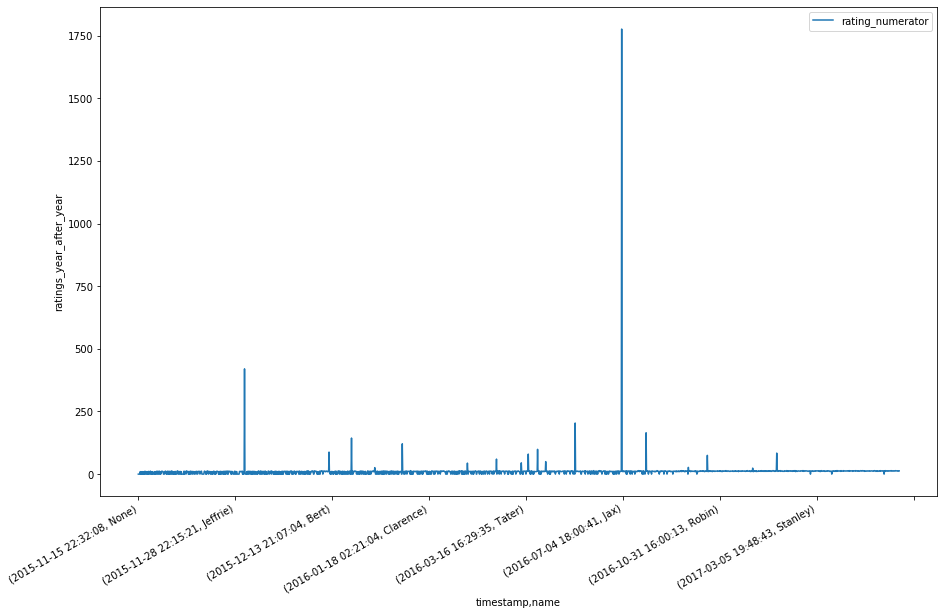

In [76]:
Dogs_with_high_ratings_year_after_year = df_group1.groupby(['timestamp', 'name'])
Dogs_with_high_ratings_year_after_year.mean().plot(subplots=True, figsize=(15,10));
plt.ylabel('ratings_year_after_year')